**I) Indicateurs d'évaluation d'un modèle:**

**1) Regression Linéaire**

**a) RMSE:**
L'écart quadratique moyen (RMSE) est l'écart-type des résidus (erreurs de prévision). Les résidus sont la mesure de l'écart entre les points de données et la ligne de régression. La métrique RMSE est la mesure de la ventilation de ces résidus. En d'autres termes, elle indique la concentration des données autour de la ligne du meilleur ajustement.

**NB:**Ce métrique quantifie les erreurs réalisées par le modèle. Plus elle est élevée, moins le modèle est performant.

**b) R2 Score:**
Le coefficient de détermination nous indique donc à quel point les valeurs prédites sont corrélées aux vraies valeurs. Attention, si les prédictions sont fortement anti-corrélées aux vraies valeurs, le coefficient de détermination sera élevé aussi.

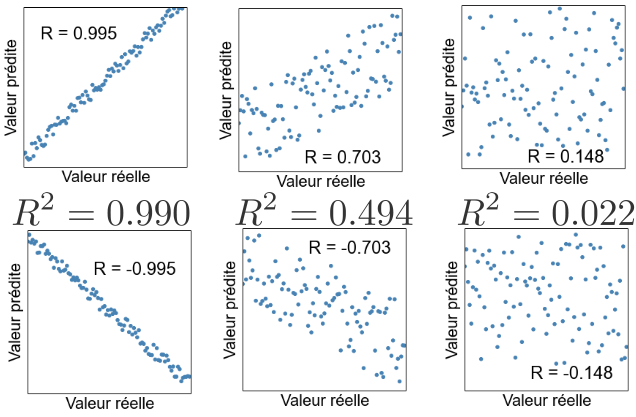

**2) Autres modèles**

**a) Matrice de confusion**

La matrice de confusion, c’est un tableau croisé entre les valeurs réelles et les prédictions. Cette matrice permet d’identifier 4 catégories de résultats :

1.   Les bonnes prédictions :

*   Vrais positifs : les clients qui ont résilié pour lesquels le score a bien prédit qu’ils allaient résilier
*   Vrais négatifs : les clients qui sont toujours abonnés et pour lesquels l’algorithme a bien prédit qu’ils resteraient abonnés
2.   Les prédictions fausses :
*   Faux négatifs : les clients qui ont résilié mais pour lesquels le score a prédit à tort qu’ils allaient rester abonnés
*   Faux positifs : les clients qui sont restés abonnés alors que le score a prédit à tort qu’ils allaient résilier

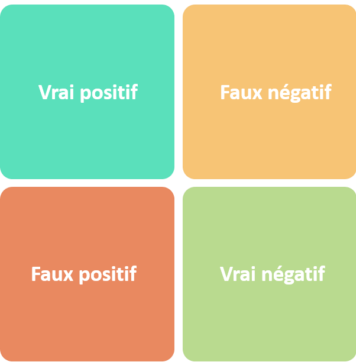








**b) Accuracy:**
L’indicateur le plus simple est l’accuracy : il indique le pourcentage de bonnes prédictions. C’est un très bon indicateur parce qu’il est très simple à comprendre.

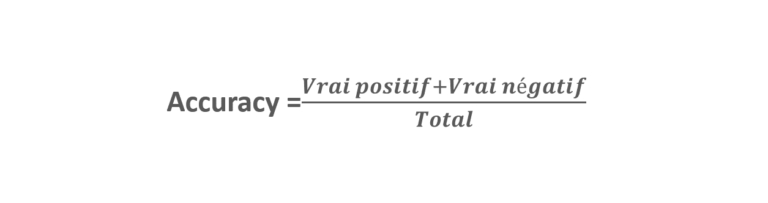

**c) Recall:**
Pour compléter l’accuracy, on calcule également le recall : il se concentre uniquement sur les clients qui ont réellement résilié et donne une indication sur la part de faux négatifs.

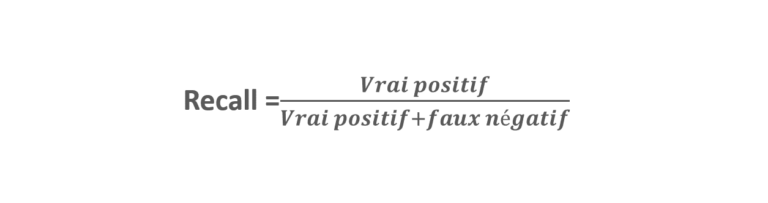

**d) Precision:**
Enfin, un 3ème indicateur vient compléter l’accuracy et le recall, c’est la precision : il se concentre uniquement sur les clients pour lesquels le modèle a prédit une résiliation et donne une indication sur les faux positifs.

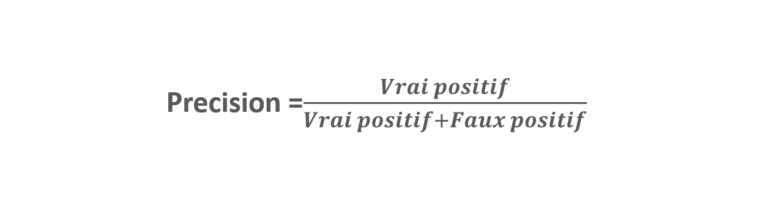

**II) Modélisation en Data Science**

**1) Regression Linéaire**

La régression linéaire est une technique d'analyse de données qui prédit la valeur de données inconnues en utilisant une autre valeur de données apparentée et connue.

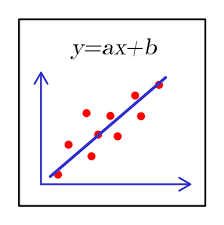

**a) Énoncé du problème:**

Créez un modèle qui prédit les ventes en fonction de l'argent dépensé sur différentes plateformes de marketing.

**b) Données:**

Utilisez l'ensemble de données publicitaires fourni dans ISLR et analysez la relation entre la « publicité télévisée » et les « ventes » à l'aide d'un modèle de régression linéaire simple.

**c) Objectif:**

Dans cet étude de cas, nous allons créer un modèle de régression linéaire pour prédire les ventes à l'aide d'une variable prédictive appropriée.

In [ ]:
# Supression d'alerte
import warnings
warnings.filterwarnings('ignore')

# Import des packages pandas et numpy
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
advertising = pd.DataFrame(pd.read_csv("advertising_reg.csv"))
advertising.head()

In [ ]:
advertising.shape

In [ ]:
advertising.info()

In [ ]:
advertising.describe()

**Data Cleaning**

In [ ]:
#Pourcentage du nombre de valeurs manquantes
advertising.isnull().sum()*100/advertising.shape[0]

**Data Visualisation**

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

In [ ]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
#Matrice de Correlation
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

**Construction du modèle**

In [ ]:
X = advertising['TV']
y = advertising['Sales']

Vous devez maintenant diviser notre variable en ensembles de formation et de test. Vous effectuerez cela en important **train_test_split** depuis la bibliothèque sklearn.model_selection. C'est généralement une bonne pratique de conserver 70 % des données dans votre ensemble de données de train et les 30 % restants dans votre ensemble de données de test.

In [ ]:
#Entrainement des données
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
import statsmodels.api as sm


Par défaut, la bibliothèque **statsmodels** ajuste une ligne sur l'ensemble de données qui passe par l'origine. Mais pour avoir une interception, vous devez utiliser manuellement l'attribut add_constant de statsmodels. Et une fois que vous avez ajouté la constante à votre ensemble de données X_train, vous pouvez continuer et ajuster une ligne de régression à l'aide de l'attribut OLS (moindres carrés ordinaires) des modèles de statistiques, comme indiqué ci-dessous.

In [ ]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr.params

In [ ]:
#Statistiques sur le modèle
print(lr.summary())

In [ ]:
#Comparaison entre la regression et les valeurs existants dans X_train
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

**Application du modèle sur la partie Test**

In [ ]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#Affichage du RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

**2) Modèle de classification**

**a) Introduction:**

De nos jours, les entreprises sont de plus en plus conscientes de l’importance des services d’abonnement, et le taux de désabonnement est un indicateur essentiel pour suivre la santé d’une entreprise basée sur un abonnement. Pour être plus précis, l'entreprise peut prendre des mesures à l'avance en prédisant le taux de désabonnement des clients afin de fidéliser les clients de manière cohérente. Par conséquent, l'objectif de ce projet est de faire une prédiction du taux de désabonnement afin que les télécommunications puissent optimiser leurs produits et services de manière proactive.

**b) Description des données:**

Les données brutes contiennent 7043 lignes (clients) et 21 colonnes (caractéristiques).


*   customer ID : numéro client
*   gender : si le client est un homme ou une femme
*   SeniorCitizen : Si le client est une personne âgée ou non (1, 0)
*   Partner : Si le client a un partenaire ou non (Oui, Non)
*   Dependents : si le client a des personnes à charge ou non (Oui, Non)
*   tenure : nombre de mois pendant lesquels le client est resté dans l'entreprise
*   PhoneService : si le client dispose d'un service téléphonique ou non (Oui, Non)
*   MultipleLines : si le client dispose de plusieurs lignes ou non (Oui, Non, Pas de service téléphonique)
*   InternetService : Fournisseur d’accès Internet du Client (DSL, Fibre optique, Non)
*   OnlineSecurity : indique si le client dispose ou non d'une sécurité en ligne (Oui, Non, Pas de service Internet)
*   OnlineBackup : si le client dispose ou non d'une sauvegarde en ligne (Oui, Non, Pas de service Internet)
*   DeviceProtection : indique si le client dispose ou non d'une protection de son appareil (Oui, Non, Pas de service Internet)
*   TechSupport : si le client dispose d'un support technique ou non (Oui, Non, Pas de service Internet)
*   StreamingTV : Si le client dispose ou non de la télévision en streaming (Oui, Non, Pas de service Internet)
*   StreamingMovies : si le client dispose ou non de films en streaming (Oui, Non, Pas de service Internet)
*   Contrat : la durée du contrat du client (mois par mois, un an, deux ans)
*   PaperlessBilling : indique si le client dispose ou non d'une facturation sans papier (Oui, Non)
*   PaymentMethod : Mode de paiement du client (Chèque électronique, Chèque postal, Virement bancaire (automatique), Carte bancaire (automatique))


*   MonthlyCharges : le montant facturé mensuellement au client.
*   TotalCharges : le montant total facturé au client
*   Churn : si le client s'est désisté ou non (Oui ou Non)















In [ ]:

import numpy as np
import pandas as pd


import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from mpl_toolkits.mplot3d import Axes3D
!pip install chart-studio
import chart_studio.plotly as py
from plotly import __version__

import graphviz

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.info()

In [ ]:
df.head(5)

In [ ]:
df.describe()

**Data Cleaning**

In [ ]:
# renommage de 'tenure' et 'gender'
df = df.rename(columns={'tenure': 'Tenure', 'gender': 'Gender'})

# convertion de 'TotalCharges' en numériques
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce', downcast='float')

# convertion de 'SeniorCitizen' en type object
df['SeniorCitizen'] = df['SeniorCitizen'].astype(np.object)

df.info()

**Data Visualisation**

In [ ]:
# Camembert pour la variable churn
churn_rate = df.Churn.value_counts() / len(df.Churn)
labels = 'Non-Churn', 'Churn'

fig, ax = plt.subplots()
ax.pie(churn_rate, labels=labels, autopct='%.f%%')
ax.set_title('Churn vs Non Churn', fontsize=16)

In [ ]:
#Graphes pour les variables continues
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,5))
    sns.distplot(df[df.Churn == 'No'][col],
                 bins=10,
                 color='orange',
                 label='Non-Churn',
                 kde=True)
    sns.distplot(df[df.Churn == 'Yes'][col],
                 bins=10,
                 color='blue',
                 label='Churn',
                 kde=True)
    plt.legend(labels)

In [ ]:
#Boite à moustache
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    fig = plt.figure(figsize=(8,3))
    sns.boxplot(df[col])

In [ ]:
#Matrice de correlation
plt.figure(figsize=(10, 8))
feature_corr = df.corr()
sns.heatmap(feature_corr, annot=True, cmap='coolwarm')

In [ ]:
for col in ['Gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=df, palette="tab10")
    plt.show()

In [ ]:
sum(df.duplicated('customerID'))

In [ ]:
df2 = df.drop(['customerID'], axis = 1)
df2.head(5)

**Encodage des données**

In [71]:
# Dummy Variables(One-Hot Encoding)
Gender = pd.get_dummies(df2['Gender'], prefix='Genger', drop_first=True)
Partner = pd.get_dummies(df2['Partner'], prefix='Partner', drop_first=True)
Dependents = pd.get_dummies(df2['Dependents'], prefix='Dependents', drop_first=True)
MultipleLines = pd.get_dummies(df2['MultipleLines'], prefix='MultipleLines', drop_first=True)
InternetService = pd.get_dummies(df2['InternetService'], prefix='InternetService', drop_first=True)
OnlineSecurity = pd.get_dummies(df2['OnlineSecurity'], prefix='OnlineSecurity', drop_first=True)
OnlineBackup = pd.get_dummies(df2['OnlineBackup'], prefix='OnlineBackup', drop_first=True)
DeviceProtection = pd.get_dummies(df2['DeviceProtection'], prefix='DeviceProtection', drop_first=True)
TechSupport = pd.get_dummies(df2['TechSupport'], prefix='TechSupport', drop_first=True)
StreamingTV = pd.get_dummies(df2['StreamingTV'], prefix='StreamingTV', drop_first=True)
StreamingMovies = pd.get_dummies(df2['StreamingMovies'], prefix='StreamingMovies', drop_first=True)
PaperlessBilling = pd.get_dummies(df2['PaperlessBilling'], prefix='PaperlessBilling', drop_first=True)
PaymentMethod = pd.get_dummies(df2['PaymentMethod'], prefix='PaymentMethod', drop_first=True)
Churn = pd.get_dummies(df2['Churn'], prefix='Churn', drop_first=True)
PaymentMethod = pd.get_dummies(df2['PhoneService'], prefix='PhoneService', drop_first=True)


df3 = pd.concat([df2, Gender, Partner, Dependents, MultipleLines, InternetService,
                 OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV,
                 StreamingMovies, PaperlessBilling, PaymentMethod, Churn], axis=1)

In [72]:
#Encodage du label
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df3['Contract']= label_encoder.fit_transform(df3['Contract'])

In [ ]:
# On enlève les colonnes initiales après encodage
list = ['Gender', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
'PaymentMethod', 'Churn', 'Contract', 'PhoneService']
df3.drop(df3[list], axis=1, inplace=True)
df3.head()

In [74]:
from sklearn.model_selection import train_test_split # split dataset
X_train, X_test, y_train, y_test = train_test_split(df3.drop('Churn_Yes',axis=1),df3['Churn_Yes'],test_size=0.3,random_state=101)

In [ ]:
X_train.isnull().sum()

In [ ]:
X_train['TotalCharges'].fillna(value=X_train['TotalCharges'].mean(), inplace=True)
X_train.isnull().sum()

In [ ]:
y_train.isnull().sum()

In [ ]:
X_test.isnull().sum()

In [ ]:
# Remplacement des valeurs manquantes pour la variable TotalCharges
X_test['TotalCharges'].fillna(value=X_test['TotalCharges'].mean(), inplace=True)
X_test.isnull().sum()

In [ ]:
y_test.isnull().sum()

In [81]:
#Standardisation: Mise en echelle des variables qui sont à des grandeurs differentes
standard_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_standard = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

In [82]:
#Normalisation: Processing utilisant une normation avec les valeurs minimales et maximales de la variable
minmax_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_minmax = minmax_scaler.transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

**Logistique Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state=0, max_iter=1000, solver='lbfgs', class_weight='balanced')
lm.fit(X_train_standard, y_train)

In [84]:
# prediction
y_pred = lm.predict(X_test_standard)

In [ ]:
# evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

**K Nearest Neighbors**

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_minmax,y_train)
y_pred = knn.predict(X_test_minmax)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

**Random Forest**

In [90]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [ ]:
# evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

**3) Modèle de segmentation**

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
dataset = pd.read_csv('Mall_Customers.csv')

In [ ]:
dataset.shape

In [ ]:
dataset.info()

In [ ]:
dataset.isnull().sum()

In [98]:
#Selection Annual Income (k$) et Spending Score (1-100) pour la segmentation
X= dataset.iloc[:, [3,4]].values

In [100]:
#Entrainement du mdoèle pour un nombre de segment allant de 1 à 11
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
#Tracage du graphe de Elbow qui permettra de choisir le nombre de cluster idéal
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

On remarque que que le dernier coude de la courbe est à partir de 5 si on zoome bien

In [102]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()